In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Statsmodels의 정규화 회귀모형
     - OLS 선형 회귀 클래스의 fit_regularied 매서드를 활용하여 Elastic Net모형 계수를 구함

In [21]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [25]:
model = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6)" 
                            "+ I(x**7) + I(x**8) + I(x**9)", data = df)

result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723115
I(x ** 4)   -18340.939664
I(x ** 5)    49326.072545
I(x ** 6)   -78884.743074
I(x ** 7)    74538.645153
I(x ** 8)   -38453.132191
I(x ** 9)     8350.254986
dtype: float64

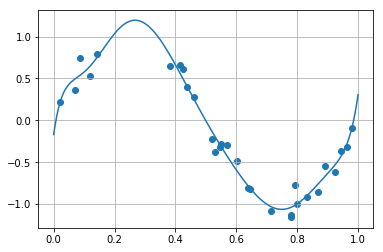

In [24]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.grid()
    plt.show()
    
plot_statsmodels(result1)


## 모수 L1_wt가 0이면 순수 Ridge 모형이 된다.

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


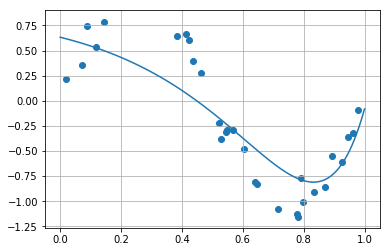

In [32]:
result2 = model.fit_regularized(alpha=0.01, L1_wt = 0)
print(result2.params)
plot_statsmodels(result2)

## 반대로 모수 L1_wt가 1이면 순수 Lasso 모형이 된다.

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


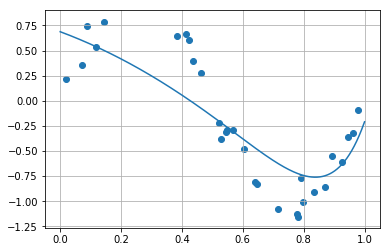

In [29]:
result3 = model.fit_regularized(alpha=0.01, L1_wt = 1)
print(result3.params)
plot_statsmodels(result3)

## 모수 L1_wt가 0과 1 사이면 Elastic Net 모형이다.

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


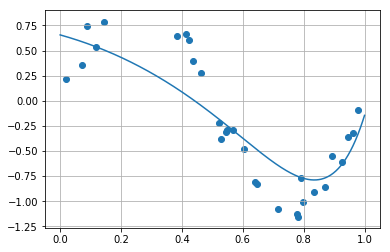

In [31]:
result4 = model.fit_regularized(alpha = 0.01, L1_wt=0.5)
print(result4.params)
plot_statsmodels(result4)

# 정규화 모형의 장점
    - 정규화 모형은 회귀 분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않도록 한다.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

X_train = [[0.5]
 [1. ]]
y_train = [0.5, 1]


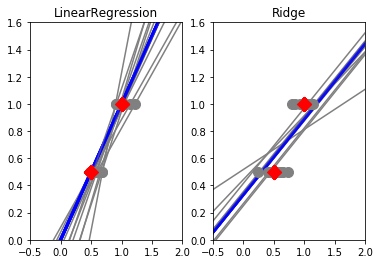

In [53]:
X_train = np.c_[.5, 1].T
print('X_train = {}'.format(X_train))
y_train = [.5, 1]
print('y_train = {}'.format(y_train))
X_test = np.c_[-1, 3].T
np.random.seed(0)

models = {"LinearRegression": LinearRegression(),
          "Ridge": Ridge(alpha=0.1)}

for i, (name, model) in enumerate(models.items()):
    ax = plt.subplot(1, 2, i+1)
    for _ in range(10):
        this_X = .1 * np.random.normal(size=(2,1)) + X_train
        model.fit(this_X, y_train)
        ax.plot(X_test, model.predict(X_test), color = '.5')
        ax.scatter(this_X, y_train, s=100, c='.5', marker='o', zorder=10)
        model.fit(X_train, y_train)
        ax.plot(X_test, model.predict(X_test), linewidth=3, color='blue', alpha=0.5)
        ax.scatter(X_train, y_train, s=100, c='r', marker='D', zorder=10)
        plt.title(name)
        ax.set_xlim(-0.5, 2)
        ax.set_ylim(0, 1.6)

In [56]:
models.items()

dict_items([('LinearRegression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)), ('Ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [59]:
X_train

array([[0.5],
       [1. ]])

In [58]:
np.random.normal(size=(2,1)) + X_train

array([[-1.20627019],
       [ 2.9507754 ]])